In [22]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import cv2
import numpy as np
import math
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [77]:
""" root = Tk()
root.withdraw()
file_path = askopenfilename(filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.bmp;*.tiff")]) """

root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
file_path = askopenfilename(filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.bmp;*.tiff")])
%gui tk
print(file_path)

D:/Mehurcki/BubDist/output/images/Recording_Date=240603_Time=144946_50C_300kgm2s_p2/Measurement0001.png


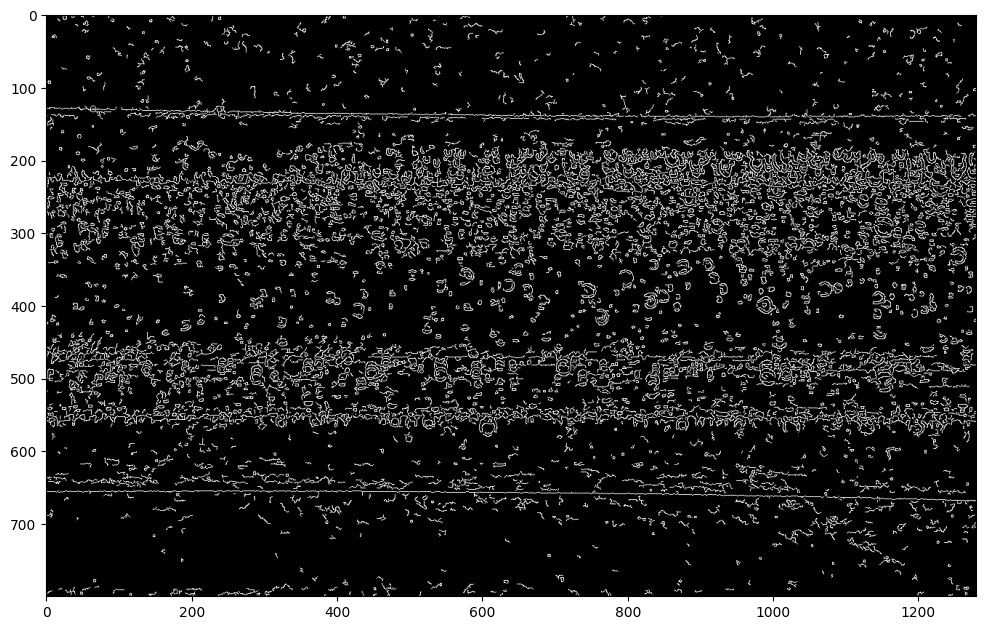

In [92]:
image1 = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

ret, thresh1 = cv2.threshold(image1, 127, 255, cv2.THRESH_BINARY)
    
blurred = cv2.GaussianBlur(image1, (3, 3), sigmaX=0, sigmaY=0)
can = cv2.Canny(blurred, threshold1=30, threshold2=60)
#can = cv2.Canny(blurred, threshold1=30, threshold2=50)
plt.figure(figsize=(12, 8))
plt.imshow(can, cmap="gray")      
plt.show()

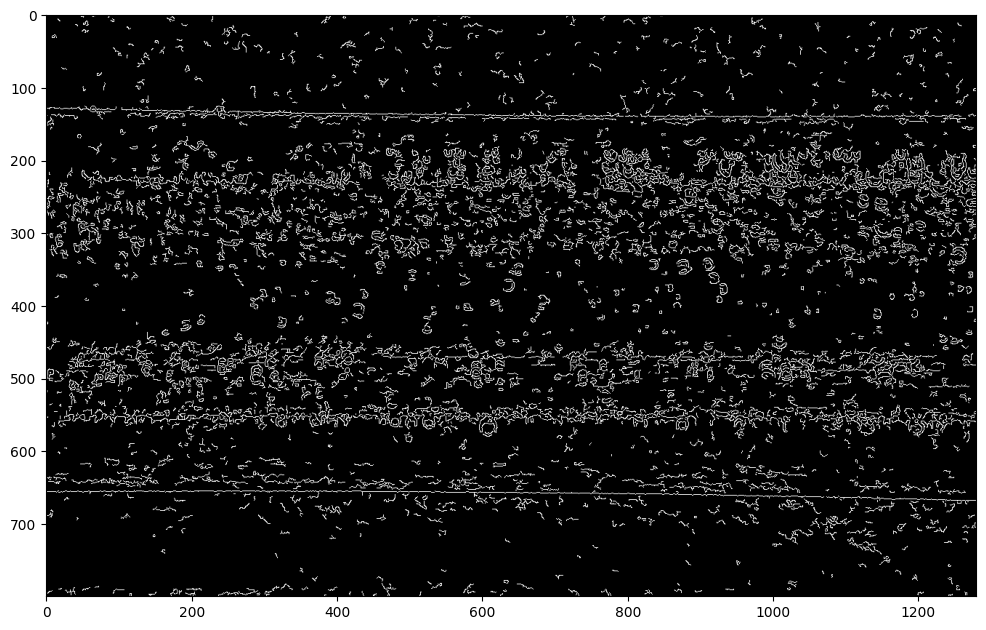

In [82]:
contours, _ = cv2.findContours(can, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_lengths = [(cv2.arcLength(contour, False), contour) for contour in contours]
sc = sorted(contour_lengths, key=lambda x: x[0], reverse=True)

# Draw the two longest contours on the original image
""" if len(sorted_contours) > 0:
    for i in range(len(sorted_contours)):
        if (cv2.arcLength(sorted_contours[i][1], False) > 20):
            cv2.drawContours(image1, [sorted_contours[i][1]], -1, (0, 255, 0), 2) """

empty = np.zeros_like(image1)
image1 = cv2.cvtColor(image1, cv2.COLOR_GRAY2RGB)

sorted_contours = []
for i in range(len(sc)):
    current_contour = sc[i][1]
    if cv2.contourArea(current_contour) *3 < cv2.arcLength(current_contour, True):
        sorted_contours.append(sc[i])
        cv2.drawContours(empty, [current_contour], -1, (255, 255, 255), 1)

plt.figure(figsize=(12, 8))
plt.imshow(empty, cmap="gray")     

([535, 655], [164, 657], [319, 133], [1000, 203], [1016, 474], [596, 571], [1144, 491], [1093, 664], [873, 475], [551, 227], [1237, 202], [1193, 574], [859, 140], [799, 231], [1045, 234], [918, 231], [922, 545], [767, 192], [381, 476], [500, 556], [682, 549], [17, 657], [236, 483], [94, 555], [794, 214], [800, 556], [10, 128], [765, 205], [598, 466], [1103, 490], [686, 140], [17, 559], [512, 472], [310, 231], [651, 237], [585, 240], [1119, 553], [494, 230], [460, 549], [109, 475], [269, 476], [142, 228], [1082, 193], [216, 232], [1090, 556], [721, 477], [543, 540], [842, 476], [160, 132], [195, 558], [386, 559], [366, 548], [342, 231], [926, 205], [1037, 194], [250, 135], [553, 138], [181, 176], [867, 561], [342, 643], [603, 192], [960, 236], [285, 629], [127, 482], [872, 231], [749, 505], [1152, 218], [585, 481], [1111, 222], [466, 227], [54, 476], [1219, 233], [1209, 270], [945, 475], [503, 205], [40, 317], [1209, 218], [1016, 325], [405, 460], [1192, 199], [1209, 241], [1119, 648], 

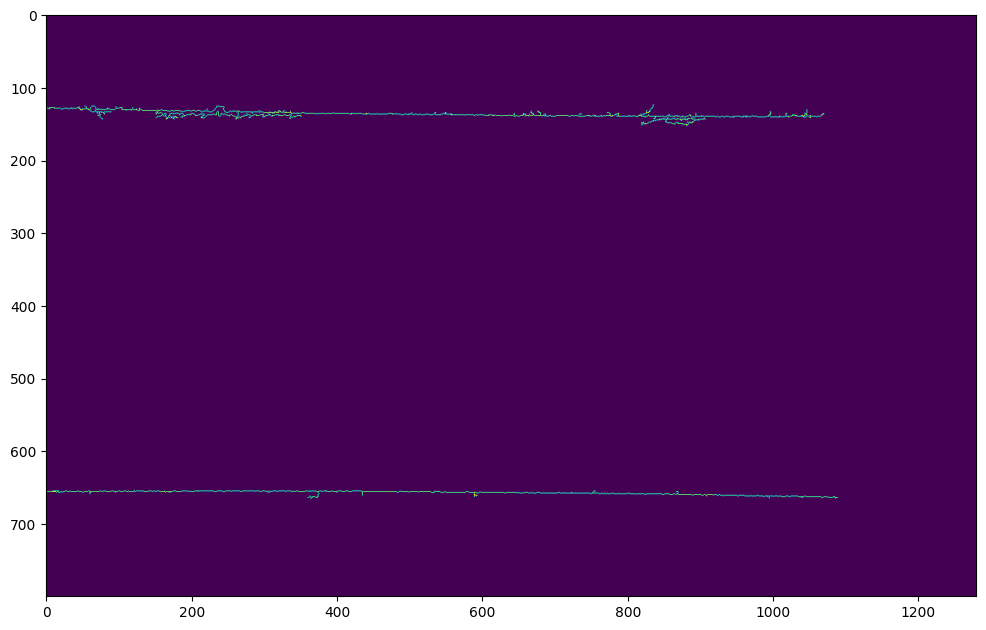

In [94]:
end_points = []
for i in range(len(sorted_contours)):
    current_contour = sorted_contours[i][1]
    eps = [(np.inf,np.inf), (0,0)]
    for point in current_contour:
        if point[0][0] < eps[0][0]:
            eps[0] = list(point[0])

        if point[0][0] > eps[1][0]:
            eps[1] = list(point[0])

    end_points.append(eps)

print(list(zip(*end_points))[0])
print(list(zip(*end_points))[1])
for i, p1 in enumerate(list(zip(*end_points))[0]):
    print(f"\r", i, len(end_points), end="")
    min_distance = float('inf')
    closest_point = None
    cpt_index = 0
    for j, p2 in enumerate(list(zip(*end_points))[1]):
        distance = np.linalg.norm(np.asarray(p1) - np.asarray(p2))
        if distance < min_distance:
            min_distance = distance
            closest_point = p2
            cpt_index = j

    cpy = np.copy(image1)
    if (min_distance < 20):   
        cv2.drawContours(cpy, [sorted_contours[i][1], sorted_contours[cpt_index][1]], -1, (0, 255, 0), 2)
        cv2.circle(cpy, closest_point, 3, (0,0,255), -1)
        cv2.circle(cpy, p1, 3, (255,0,0), -1)
        cv2.line(empty, closest_point, p1, (255,255,255), 1)

    """ cv2.imshow("image", cpy)
    cv2.waitKey() """
    
contours, _ = cv2.findContours(empty, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

plt.figure(figsize=(12, 8))
plt.imshow(empty)

contour_lengths = [(cv2.arcLength(contour, False), contour) for contour in contours]
sorted_contours = sorted(contour_lengths, key=lambda x: x[0], reverse=True)

process_image = np.zeros_like(empty)

if len(sorted_contours) > 0:
    for i in range(min(2, len(sorted_contours))):
        cv2.drawContours(process_image, [sorted_contours[i][1]], -1, (255, 255, 255), 1)

plt.imshow(process_image)
plt.show()

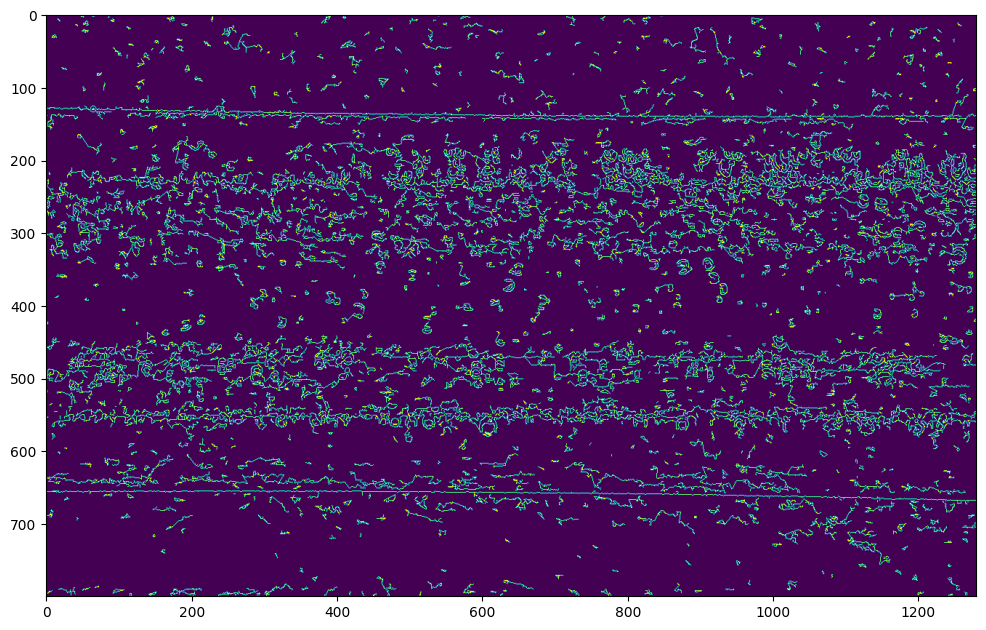

In [95]:
plt.figure(figsize=(12, 8))
plt.imshow(empty)

Coefficients of top polynomial: [-8.07564756e-06  2.02868341e-02  1.28067015e+02]
Coefficients of bottom polynomial: [4.64721467e-06 4.23664347e-04 6.56020379e+02]
Difference of maximum and minimum width: 1.48%, 7.75px


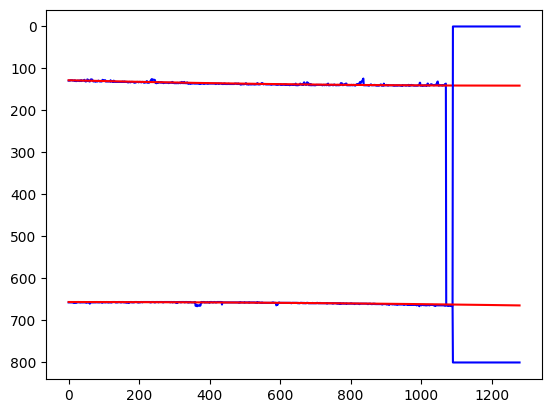

In [99]:
def fit_parabola(height):
    sigma = 2.0  # Standard deviation for Gaussian kernel
    smooth_col = gaussian_filter1d(height, sigma)
    x_val = np.asarray(range(len(height)))

    median = np.median(smooth_col)
    std = np.std(smooth_col)

    # Define the range to filter out extreme values (within two standard deviations from the mean)
    lower_bound = median - 200
    upper_bound = median + 200

    mask = (smooth_col >= lower_bound) & (smooth_col <= upper_bound)
    x_filtered = x_val[mask]
    smooth_col_filtered = smooth_col[mask]

    coefficients = np.polyfit(x_filtered, smooth_col_filtered, 2)
    polynomial = np.poly1d(coefficients)
    y_values = polynomial(x_val)

    return y_values, coefficients

top_height = []
bottom_height = []

for col in range(process_image.shape[1]):
    top_c = 0
    bottom_c = 0
    for row in range(process_image.shape[0]):
        if process_image[row, col] == 0:
            top_c += 1
        elif process_image[row, col] == 255:
            break
    for row in reversed(range(process_image.shape[0])):
        if process_image[row, col] == 0:
            bottom_c += 1
        elif process_image[row, col] == 255:
            break
    
    cc = process_image.shape[0] - top_c - bottom_c
    top_height.append(top_c)
    bottom_height.append(process_image.shape[0] - bottom_c)

y_top, coef_top = fit_parabola(top_height)
y_bottom, coef_bottom = fit_parabola(bottom_height)

print(f"Coefficients of top polynomial: {coef_top}")
print(f"Coefficients of bottom polynomial: {coef_bottom}")

tube_size = y_bottom - y_top
max_t = max(tube_size)
min_t = min(tube_size)
avg_t = np.mean(tube_size)

diff = max_t - min_t

p_diff = np.round(diff/avg_t * 100, 2)
diff = np.round(diff, 2)

print(f"Difference of maximum and minimum width: {p_diff}%, {diff}px")


plt.gca().invert_yaxis()

plt.plot(top_height, color="blue")
plt.plot(y_top, color="red")
plt.plot(bottom_height, color="blue")
plt.plot(y_bottom, color="red")
plt.show()
   

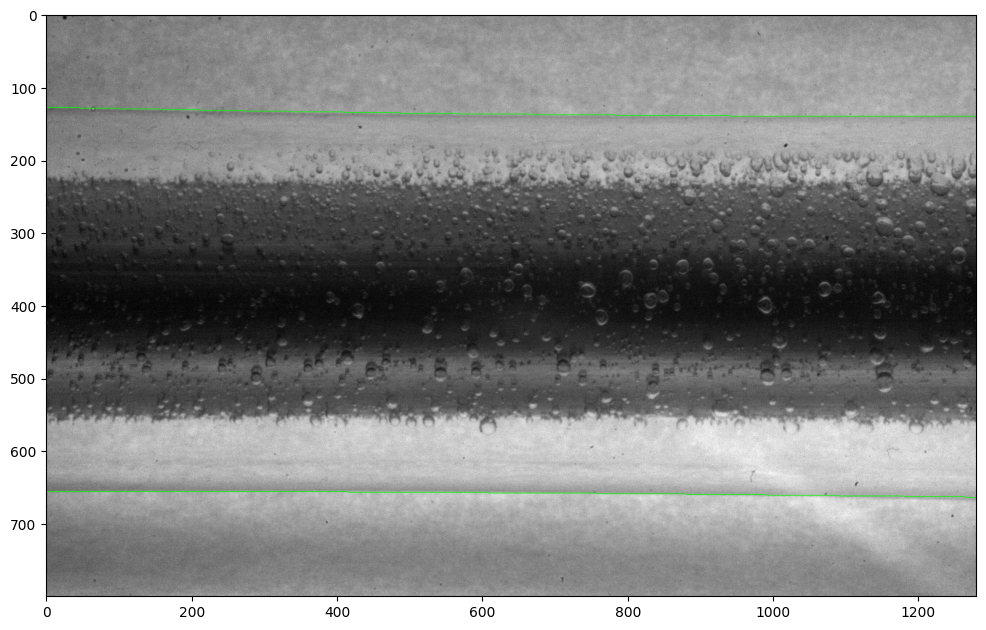

In [105]:
image1 = cv2.cvtColor(image1, cv2.COLOR_GRAY2RGB)

for i in range(len(y_top)):
    image1[int(y_top[i]), i] = (0, 255, 0)
    image1[int(y_bottom[i]), i] = (0, 255, 0)

plt.figure(figsize=(12, 8))
plt.imshow(image1)
plt.show()